# 1.0 Full Exploratory Data Analysis

## Libraries

In [1]:
%load_ext autoreload
%autoreload 2

Clave para que las rutas funcionen
1. Abrir una terminal donde este mi archivo
1.1. esto es obvio, pero siempre activar mi conda en este carpeta si no se activa automaticamente
2. colocal comando: pip install --editable .
3. ejecutar primero siempre
%load_ext autoreload
%autoreload 2
4. Ejecutar después la librería (o si no poner el archivo de donde queremos llamar la librerías en la carpeta padre, no en una subcarpeta como esta en este proyecto)
import sys
sys.path.append("..") 


In [3]:
import sys
sys.path.append("..")

In [4]:
import cookiecutter_conda_data_science.utils.paths as path #si te das cuenta esto es un modulo de python creado que esta en cookiecutter_conda_data_science/utils/paths.py
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Download data

### Specify input and output files

In [11]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [12]:
#Librerías que necesitaremos para web scraping (sacar ese csv de la pagina web)
import codecs
from contextlib import closing
import csv
import requests

In [13]:
#Es muy importante este paso, creamos una lista vacia
lista = [] 

In [14]:
# Abrimos el archivo de la pagina y lo pasamos a la lista (de objeto reader a list->más manipulable)
with closing(requests.get(covid_url, stream=True)) as r:
    reader = csv.reader(codecs.iterdecode(r.iter_lines(), 'utf-8'))
    for row in reader:
       lista.append(row) 

In [15]:
# Confirmamos el tipo de dato de nuestra lista
print(type(lista))

<class 'list'>


In [16]:
# pasamos la lista a dataframe
df = pd.DataFrame(lista)
# Ponemos la fila 0 como la columna de nuestro dataframe
df.columns = df.iloc[0] 
# Borramos el registro o fila 0 (Ya que esta paso a ser headers)
df.drop(df.index[0], inplace=True)
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23,1/13/23,1/14/23,1/15/23
1,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207766,207766,207819,207841,207866,207900,207900,207900,207900,207900
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,333887,333916,333947,333948,333995,333995,334018,334018,334029,334037
3,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,271250,271254,271254,271255,271262,271268,271277,271286,271287,271287


In [ ]:
#Guardamos el archivo en nuestra ruta data/raw
df.to_csv(covid_file)

## Process data

### Read data

In [18]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [19]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 1094 entries, Unnamed: 0 to 1/14/23
dtypes: int64(1), object(1093)
memory usage: 4.8+ MB


C:\Users\calde\AppData\Local\Temp\ipykernel_7916\1282482540.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256

**Nota** --> Algo importante de cualquier proyecto es evaluarlo individualmente, en mi caso a mi me apareció una columna nueva llamada 'Unnamed: 0' y otros errores que tuve que trabajar a continuación para procesar/limpiar mi archivo raw

In [20]:
# Elimino columna 'Unnamed: 0'
covid_df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Elimino todos los datos que digan "Country/Region" dentro de mi columna "Country/Region"
covid_df.drop(covid_df[(covid_df['Country/Region'] == "Country/Region")].index, inplace=True)
# Reemplazo la , por nada ya que al hacer al utilizar la función pivot me dividía las columnas
covid_df["Country/Region"] = [i.replace(",","") for i in covid_df["Country/Region"]]

In [21]:
# Verifico si hay datos duplicados 
covid_df[covid_df.duplicated()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/5/23,1/6/23,1/7/23,1/8/23,1/9/23,1/10/23,1/11/23,1/12/23,1/13/23,1/14/23
290,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207748,207766,207766,207819,207841,207866,207900,207900,207900,207900
291,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,333850,333887,333916,333947,333948,333995,333995,334018,334018,334029
292,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,271244,271250,271254,271254,271255,271262,271268,271277,271286,271287
293,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47781,47781,47781,47781,47781,47781,47781,47781,47781,47781
294,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,6370533,6370996,6371116,6371259,6371362,6371866,6372236,6372577,6372901,6373238
508,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,5557941,5557941,5557941,5557941,5557941,5557941,5557941,5557941,5557941,5557941
509,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,490309,490436,490493,490622,490797,490946,491062,491177,491177,491304
510,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,3312085,3312085,3312085,3312085,3316192,3316192,3316192,3316192,3316192,3316192


In [22]:
# Elimino datos duplicados
covid_df.drop_duplicates(inplace=True)

### Process data

**Nota** Con la siguiente expresión lo que hago es primero seleccionar las columnas "Country/Region" Y todas fechas con esta expresión cool "*/*/*" (si te das cuenta arriba hay bastantes). Después con pivot_longer lo que hago es casi como un transponer de toda mis fechas que estaban en columnas a filas, después utilizo la misma lógica de _ para transformar la columna a fecha **Esta es una expresión que debo estudiar un poco más a profundidad**

In [23]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [67]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [68]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [5]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [6]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387684 entries, 0 to 387683
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  387684 non-null  object
 1   date            387684 non-null  object
 2   value           387684 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.9+ MB


In [26]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [7]:
# Cambio los valores de la columna "value" a enteros
processed_covid_df["value"] = [int(i) for i in processed_covid_df["value"]]

### Explore data

In [8]:
# pongo el estilo de las gráficas sns que utilizaré más adelante
sns.set_style("darkgrid")

In [9]:
# vuelvo y transformo la columna "date" en datetime
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [12]:
# Solamente seleccionamos los paises de la lista countries de nuestro dataframe processed_covid_df
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


In [13]:
# verifico los datos antes de empezar a graficar
some_latam_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6534 entries, 7 to 387543
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  6534 non-null   object        
 1   date            6534 non-null   datetime64[ns]
 2   value           6534 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 204.2+ KB


In [32]:
# cambio los datos de la col "value" a tipo entero
some_latam_countries_df["value"] = [int(i) for i in some_latam_countries_df["value"]]

C:\Users\calde\AppData\Local\Temp\ipykernel_7916\343432811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_latam_countries_df["value"] = [int(i) for i in some_latam_countries_df["value"]]


In [33]:
# re verifico los datos de nuevo
some_latam_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6534 entries, 7 to 387543
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  6534 non-null   object        
 1   date            6534 non-null   datetime64[ns]
 2   value           6534 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 204.2+ KB


Plot time series.

<AxesSubplot:xlabel='country_region', ylabel='value'>

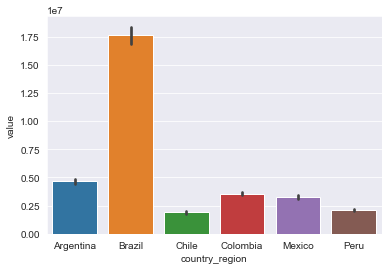

In [14]:
sns.barplot( data=some_latam_countries_df,
    x="country_region",
    y="value")

In [ ]:
# llamamos función que guardamos en nuestra carpeta visualization
import cookiecutter_conda_data_science.visualization.visualize as visualize

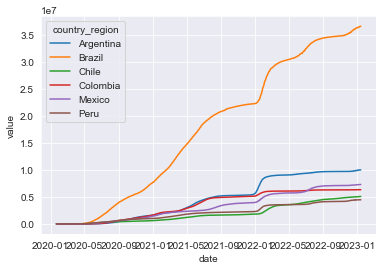

In [15]:
visualize.covid_time_series(some_latam_countries_df)

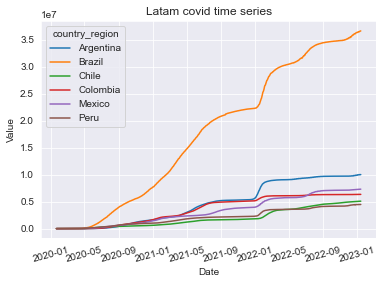

In [40]:
# esta misma funcion esta en la ruta visualization.visualize
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");

#### Latam in global context

Top `n` countries.

In [ ]:
top_countries_df = (
    processed_covid_df.select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .sum()
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

Plot to Latam in highlighted bars.

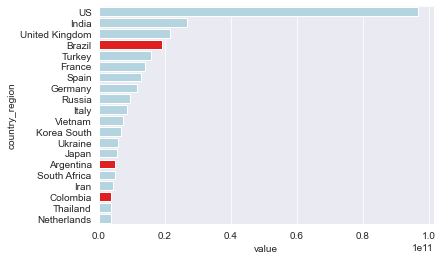

In [17]:

visualize.top_latam(top_countries_df)

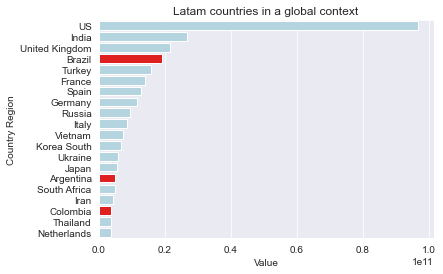

In [76]:
# esta misma funcion esta en la ruta visualization.visualize
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");